In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

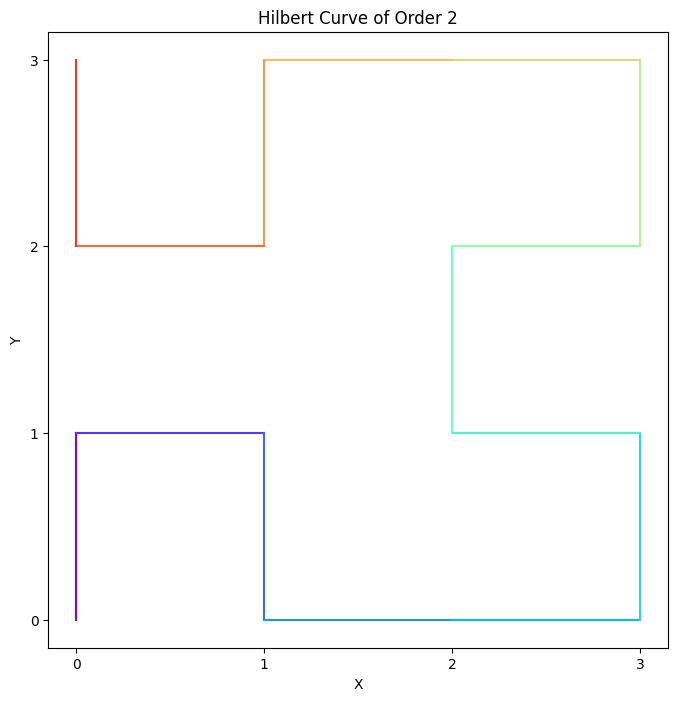

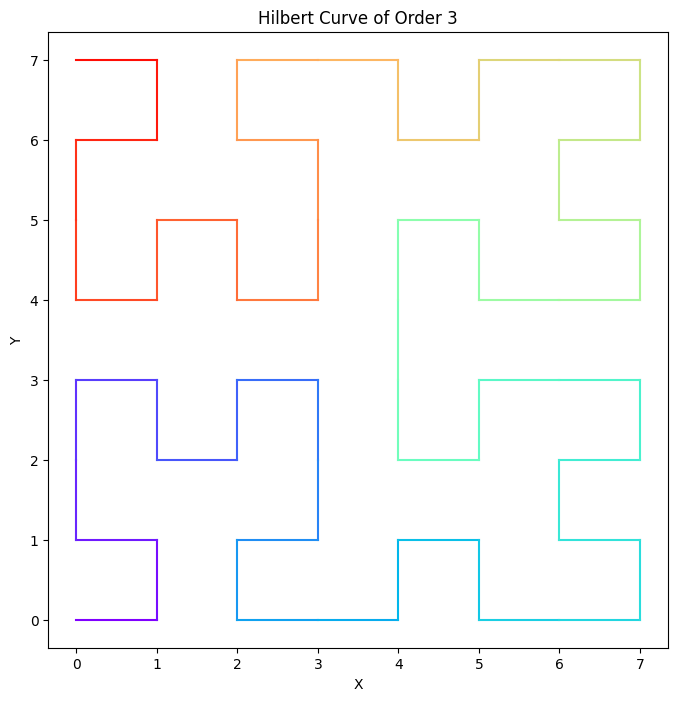

In [2]:
def plot_hilbert_curve(order):
    """
    根据指定阶数的Hilbert曲线的pth文件绘制路径并输出图片。
    
    参数:
        order (int): 曲线的阶数。
    """
    # 加载Hilbert曲线的张量
    curve_tensor = torch.load(f'../../data/hilbert/hilbert_curve_order_{order}.pth').cpu()
    # curve_tensor = rotate90(curve_tensor, order)
    dim = 1<<order
    # 提取坐标
    coords = np.array([[x, y] for x in range(dim) for y in range(dim)])
    x = coords[:, 0]
    y = coords[:, 1]
    flat_coords = y * dim + x
    hil_inds = curve_tensor[flat_coords].long()
    inds_curt_to_next = torch.argsort(hil_inds)
    x_coords = x[inds_curt_to_next]
    y_coords = y[inds_curt_to_next]
    
    # 生成颜色映射
    colors = plt.cm.rainbow(np.linspace(0, 1, len(x_coords)))
    
    # 绘制Hilbert曲线
    plt.figure(figsize=(8, 8))
    for i in range(len(x_coords) - 1):
        plt.plot(x_coords[i:i+2], y_coords[i:i+2], color=colors[i])
    # plt.plot(x_coords, y_coords, marker='o')
    plt.title(f'Hilbert Curve of Order {order}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(False)
    # 设置刻度步长为1
    plt.xticks(range(min(x_coords), max(x_coords) + 1, 1))
    plt.yticks(range(min(y_coords), max(y_coords) + 1, 1))
    
    plt.show()
    
plot_hilbert_curve(2)
plot_hilbert_curve(3)

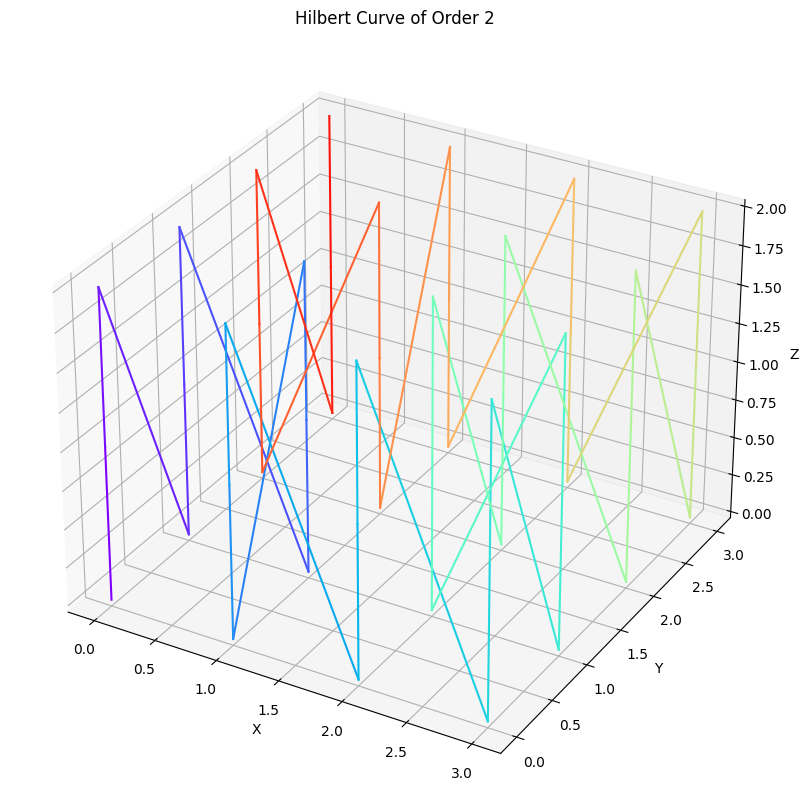

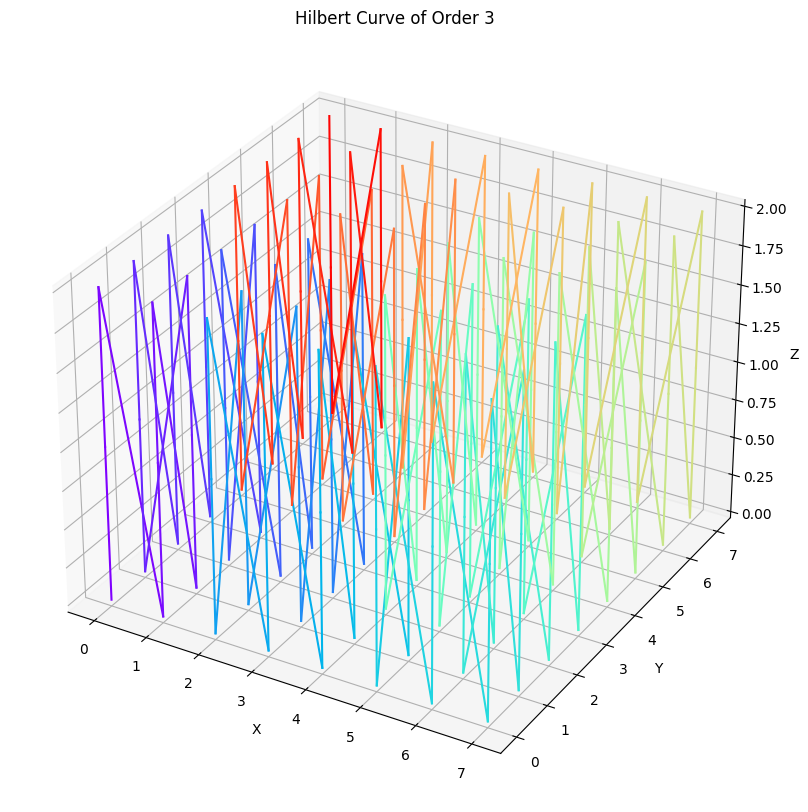

In [3]:
def plot_hilbert_curve_3d(order, z_dim = 3):
    """
    根据指定阶数的Hilbert曲线的pth文件绘制三维路径并输出图片。
    
    参数:
        order (int): 曲线的阶数。
    """
    # 加载Hilbert曲线的张量
    curve_tensor = torch.load(f'../../data/hilbert/hilbert_curve_order_{order}.pth').cpu()
    # curve_tensor = rotate90(curve_tensor, order)
    dim = 2 ** order
    # 提取坐标
    coords = np.array([[x, y, z] for x in range(dim) for y in range(dim) for z in range(z_dim)])
    x = coords[:, 0]
    y = coords[:, 1]
    z = coords[:, 2]
    flat_coords = y * dim + x
    hil_inds = (curve_tensor[flat_coords] * z_dim + z).long()
    inds_curt_to_next = torch.argsort(hil_inds)
    x_coords = x[inds_curt_to_next]
    y_coords = y[inds_curt_to_next]
    z_coords = z[inds_curt_to_next]

    # 生成颜色映射
    colors = plt.cm.rainbow(np.linspace(0, 1, len(x_coords)))

    # 绘制三维Hilbert曲线
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(x_coords) - 1):
        ax.plot(x_coords[i:i+2], y_coords[i:i+2], z_coords[i:i+2], color=colors[i])
    ax.set_title(f'Hilbert Curve of Order {order}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

plot_hilbert_curve_3d(2)
plot_hilbert_curve_3d(3)

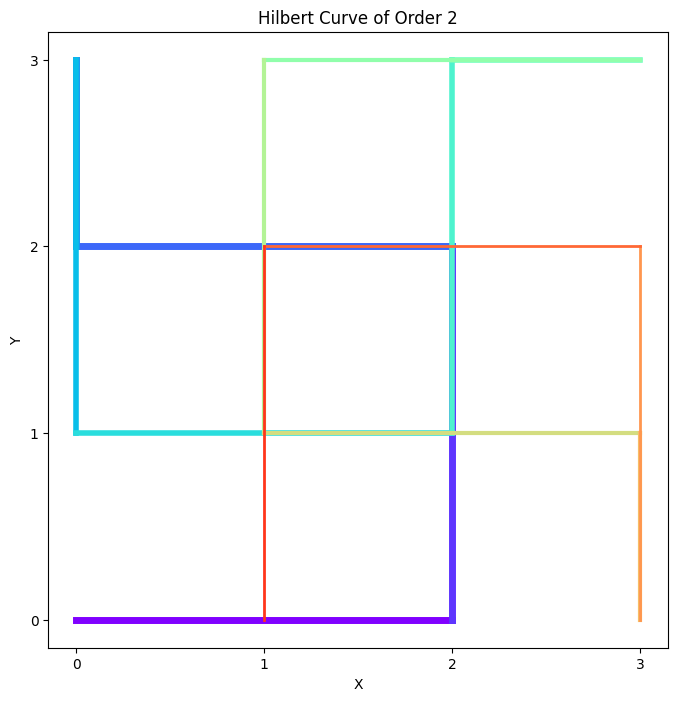

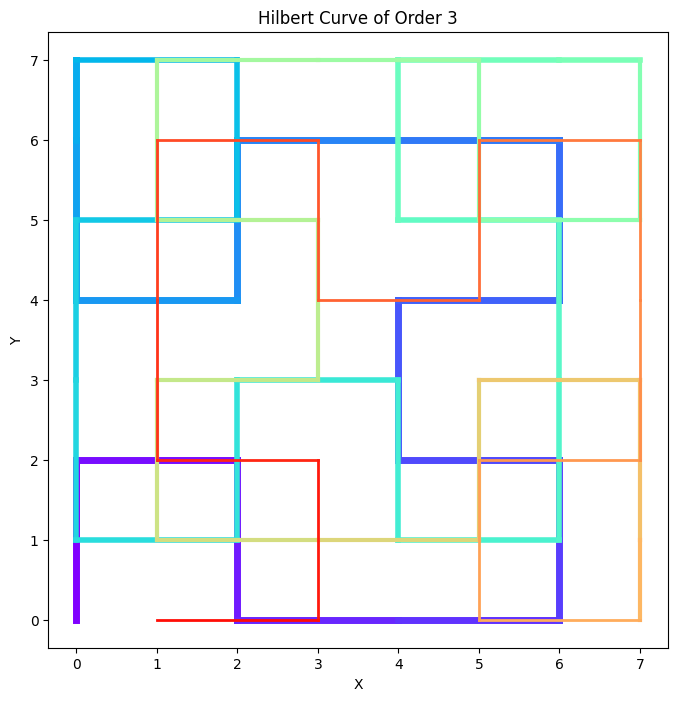

In [4]:
def plot_hilbert_curve_es(order):
    """
    根据指定阶数的Hilbert曲线的pth文件绘制路径并输出图片。
    
    参数:
        order (int): 曲线的阶数。
    """
    # 加载Hilbert曲线的张量
    curve_tensor = torch.load(f'../../data/hilbert/hilbert_curve_es_order_{order}.pth').cpu()
    s = 1<<(order-1)
    # curve_es = torch.cat([curve_tensor + i*s*s for i in range(4)], dim=0)
    
    # curve_tensor = rotate90(curve_tensor, order)
    # 提取坐标
    coords = np.array([[x, y] for x in range(2*s) for y in range(2*s)])
    x = coords[:, 0]
    y = coords[:, 1]
    
    flat_coords = ((y//2)*2*s+(x//2)) + (y%2)*s + (x%2)*2*s*s 
    # flat_coords = (1-y%2)*(1-x%2)*((y//2)*2*s+(x//2)) + \
    #               (y%2)*(1-x%2)*((y//2)*2*s+(x//2+s)) + \
    #               (1-y%2)*(x%2)*((y//2+s)*2*s+(x//2)) + \
    #               (y%2)*(x%2)*((y//2+s)*2*s+(x//2+s))
    hil_inds = curve_tensor[flat_coords].long()
    inds_curt_to_next = torch.argsort(hil_inds)
    x_coords = x[inds_curt_to_next]
    y_coords = y[inds_curt_to_next]
    
    # x_coords = x_coords[:4]
    # y_coords = y_coords[:4]
    
    # 生成颜色映射
    colors = plt.cm.rainbow(np.linspace(0, 1, len(x_coords)))
    linewidth = [5] * (len(x_coords) // 4) + [4] * (len(x_coords) // 4) + [3] * (len(x_coords) // 4) + [2] * (len(x_coords) - 3 * (len(x_coords) // 4))
    
    # 绘制Hilbert曲线
    plt.figure(figsize=(8, 8))
    for i in range(len(x_coords) - 1):
        plt.plot(x_coords[i:i+2], y_coords[i:i+2], color=colors[i], linewidth=linewidth[i])
    # plt.plot(x_coords, y_coords, marker='o')
    plt.title(f'Hilbert Curve of Order {order}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(False)
    # 设置刻度步长为1
    plt.xticks(range(min(x_coords), max(x_coords) + 1, 1))
    plt.yticks(range(min(y_coords), max(y_coords) + 1, 1))
    
    plt.show()
    
plot_hilbert_curve_es(2)
plot_hilbert_curve_es(3)

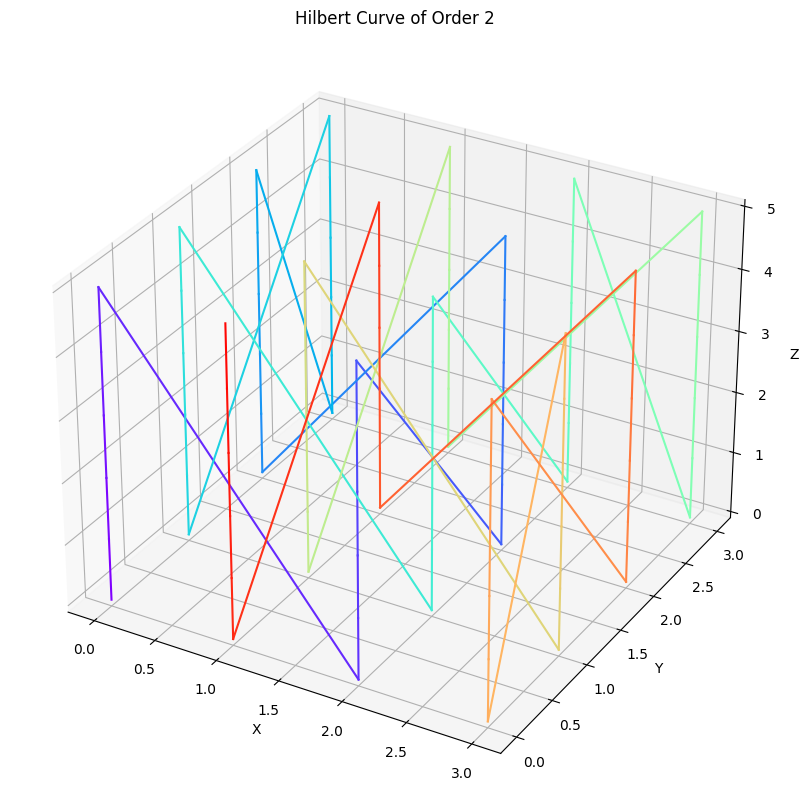

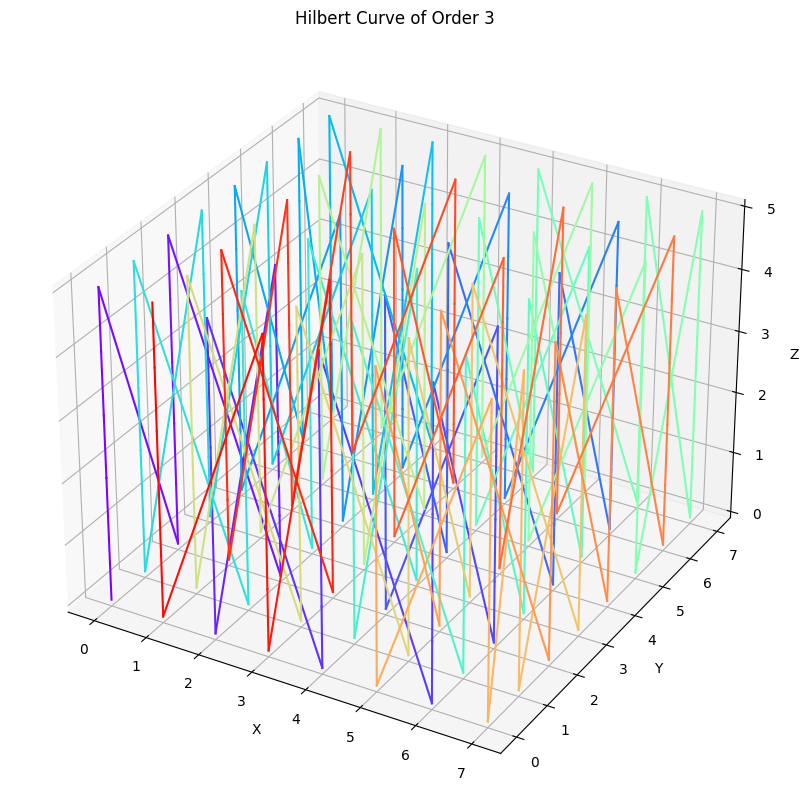

In [5]:
def plot_hilbert_curve_es_3d(order, z_dim = 6):
    """
    根据指定阶数的Hilbert曲线的pth文件绘制路径并输出图片。
    
    参数:
        order (int): 曲线的阶数。
    """
    # 加载Hilbert曲线的张量
    curve_tensor = torch.load(f'../../data/hilbert/hilbert_curve_es_order_{order}.pth').cpu()
    s = 1<<(order-1)
    # curve_es = torch.cat([curve_tensor + i*s*s for i in range(4)], dim=0)
    
    # curve_tensor = rotate90(curve_tensor, order)
    # 提取坐标
    coords = np.array([[x, y, z] for x in range(2*s) for y in range(2*s) for z in range(z_dim)])
    x = coords[:, 0]
    y = coords[:, 1]
    z = coords[:, 2]
    
    flat_coords = y * s  + (x // 2) + (x % 2) * 2 * s * s
    hil_inds = (curve_tensor[flat_coords] * z_dim + z).long()
    inds_curt_to_next = torch.argsort(hil_inds)
    x_coords = x[inds_curt_to_next]
    y_coords = y[inds_curt_to_next]
    z_coords = z[inds_curt_to_next]

    # 生成颜色映射
    colors = plt.cm.rainbow(np.linspace(0, 1, len(x_coords)))

    # 绘制三维Hilbert曲线
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(x_coords) - 1):
        ax.plot(x_coords[i:i+2], y_coords[i:i+2], z_coords[i:i+2], color=colors[i])
    ax.set_title(f'Hilbert Curve of Order {order}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    
plot_hilbert_curve_es_3d(2)
plot_hilbert_curve_es_3d(3)